<a href="https://colab.research.google.com/github/Preritp2/Book_Recommendation_System_Capstone_Project_4/blob/main/Book_Recommendation_System_Prerit_Tyagi_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>**BOOK RECOMMENDATION SYSTEM**</u></b>


#**Problem Statement**



During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

#**The Data**

**The Book-Crossing dataset comprises 3 files.**

**● Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**● Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

**● Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

#**Goal**
**The main objective is to create a book recommendation system for users.**

#**Project Work flow**

1.Importing Libraries

2.Loading the Datasets

3.Exploratory Data Analysis

3.1 Users Dataset

3.2 Books Dataset

3.3 Ratings Dataset

4.Merging all Datasets

5.Popularity Based Filtering

6.Collaborative Filtering Recommender

6.1 Model Based Approach

6.2 Memory Based Approach

8.Evaluating Results

Conclusion

#**1. Importing libraries**

In [ ]:
# Importing all required libraries

import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import os
import re
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# To supress the warning messages

import warnings
warnings.filterwarnings('ignore')


#**2. Loading the Datasets**

##Loading Users data.

In [ ]:
# Loading Users data and creating dataframe
users = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Prerit Tyagi/Copy of Users.csv')

In [ ]:
# Printing first 5 rows of users dataframe

users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


**In our users dataset, there are three features; User_ID, Location and Age.**




In [ ]:
# Let's see datatypes of all columns

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


**Two numeric columns and one object column.**

#**Loading Books data**

In [ ]:
# Loading Books data

books = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Prerit Tyagi/Copy of Books.csv')

In [ ]:
# Let's see first 4 rows of books dataset

books.head(4)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


**In our books dataset, there are 8 features; 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'.**

In [ ]:
# Let's see datatypes of all columns

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


**All columns are of object data type.**

#**Loading Ratings data**

In [ ]:
# Ratings data

ratings = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Prerit Tyagi/Copy of Ratings.csv')

In [ ]:
# Let's see first 5 rows of ratings dataset

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**In our ratings dataset, there are three features; User_ID, ISBN and Book_Rating.**

In [ ]:
# Let's see datatypes of all columns

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


**Two numeric columns and one object column**

#**Dimension of all three datasets**

In [ ]:
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


#**3. Exploratory Data Analysis**

##**3.1 Users Dataset**

###**Let's check for null values.**

In [ ]:
# Function to find %age of missing values

def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [ ]:
# Finding %age of null values

missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


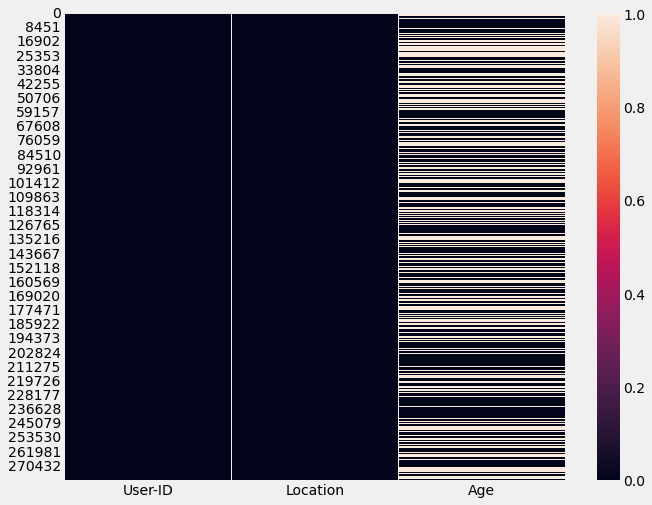

In [ ]:
# plotting heat map of null values

fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(users.isna())
plt.show()

**Age column has around 40% null values.**

###**Let's check the distribution of Age column.**

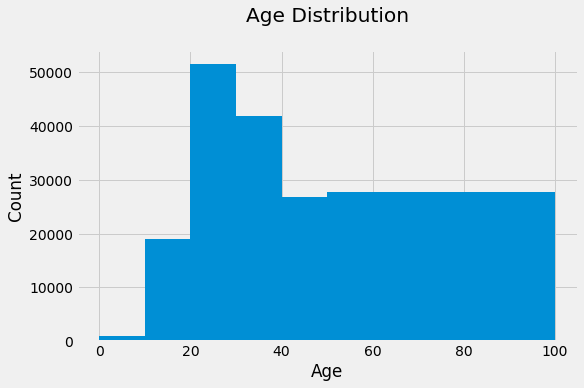

In [ ]:
# Histplot showing distribution of age

plt.figure(figsize=(8,5))
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Majority of users are from age bracket 20-30 years**

###**Let's check for outliers in Age column.**

Text(0.5, 1.0, 'Boxplot of Age column')

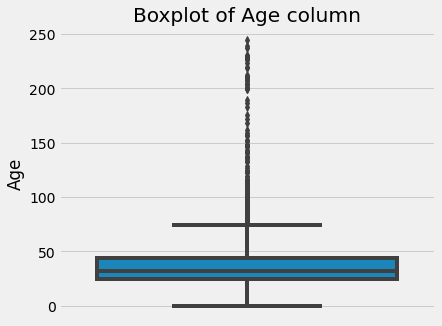

In [ ]:
# Plotting boxplot for age column

plt.figure(figsize=(6,5))
sns.boxplot(y='Age', data=users)
plt.title('Boxplot of Age column')

In [ ]:
# Descriptive stats of Age column

users.Age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

**From boxplot as well as descriptive stats, it is clear that maximum value of age is 244.
So, there are outliers in Age column.**

##**Let's clean Age column**

Text(0.5, 1.0, 'Age Distribution Plot')

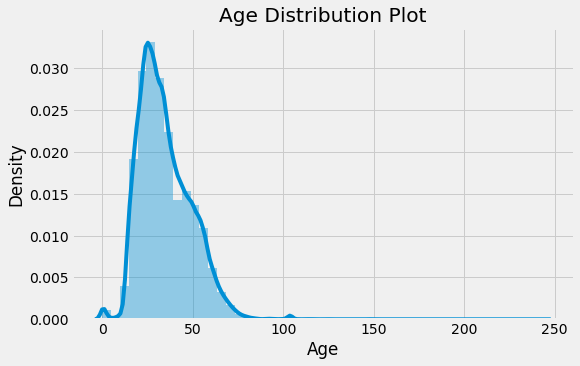

In [ ]:
# Displot of Age column

plt.figure(figsize=(8,5))
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

**Age below 5 and above 100 do not make much sense for our book rating case.**

**So, we can replace these by NaNs.**

In [ ]:
# Replacing outlier data with NaN

users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

**Replacing NaN values with mean**

In [ ]:
# Replacing Nan values with mean

users.Age = users.Age.fillna(users.Age.mean())

In [ ]:
# Let's see total no of null values again

users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

#####**Great! We have cleaned our Age column.**

###**Let's see unique values in location column.**

In [ ]:
# Printing unique values of location column

users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

**Location column contains some special characters.**

**Let's clean this column and also create a new column 'Country'**

In [ ]:
# Creating column Country

for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

#####**Now we can drop Location column**

In [ ]:
# dropping location column

users.drop('Location',axis=1,inplace=True)

In [ ]:
# Converting location column into string datatype

users['Country']=users['Country'].astype('str')

In [ ]:
# Extracting elements of Country column

a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

#####**Here, we can see that some data has misspellings. So, let's correct them.**

In [ ]:
# Replacing incorrect words with correct one

users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)


Text(0.5, 1.0, 'Count of users Country wise')

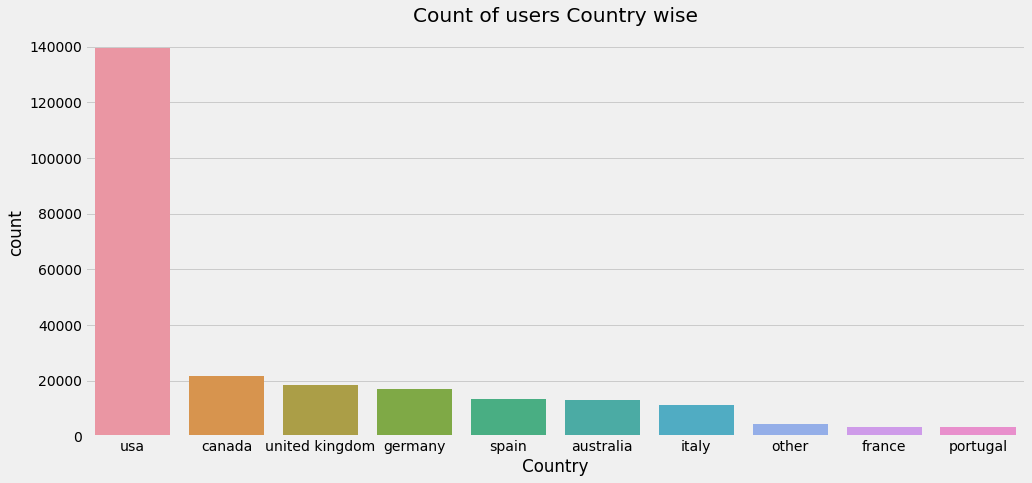

In [ ]:
# Barplot to show count of users as per country

plt.figure(figsize=(15,7))
sns.countplot(x='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

#####**Majority of readers are from USA followed by Canada.**

#**3.2 Books Dataset**

###**Top 10 publishers who have published maximum number of books.**

Text(0.5, 1.0, 'Top 10 Publishers')

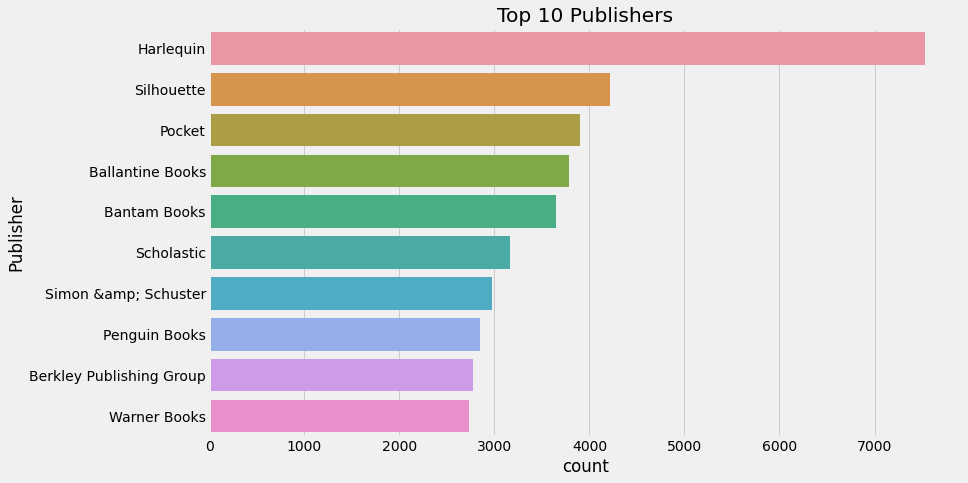

In [ ]:
# Barplot to show top 10 publishers.

plt.figure(figsize=(12,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

######**Harleyquin had published maximum number of books followed by Silhouette.**

####**Top 10 authors who have written the maximum number of books.**

Text(0.5, 1.0, 'Top 10 Authors')

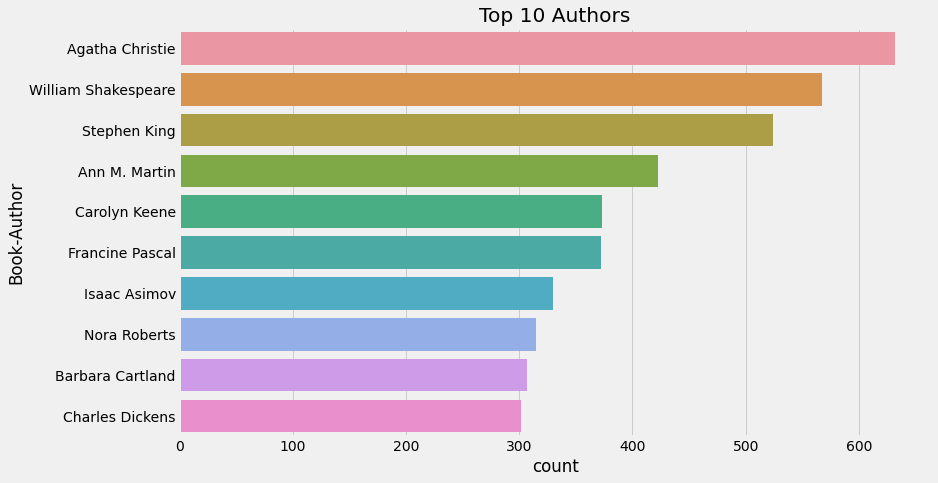

In [ ]:
# Barplot to show top 10 authors

plt.figure(figsize=(12,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

#####**Agatha Christie had written maximum number of books followed by William Shakespeare.**

####**Year-of-Publication column**

In [ ]:
# Printing unique values of location column

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

**Points to note:**

Year-of-Publication column contains some name of publishers.

Also, some values are int and some values are string.

####**It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file.**

######**First, let's convert all of them into string datatype**

In [ ]:
# Converting all values into string

books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')

#####**Let's explore and clean Year-of-Publication column**

In [ ]:
# Investigating the rows having 'DK Publishing Inc' as Year-of-Publication

books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


######**Book Author is incorrectly loaded with Book Title, so let's correct them**

In [ ]:
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [ ]:
# Let's check the corrections

books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
# Investigating the rows having 'Gallimard' as Year-of-Publication

books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
# Making required corrections as above, keeping other fields intact

books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [ ]:
# Let's check the corrections

books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
# Converting each values from string to integers

books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


**Points to note:**

The value 0 for Year-of-Publication doesn't make any sense.

Years after 2006 are invalid as this dataset was published in 2004.

So, we are setting invalid years as NaN.

Also, considering extreme value as 2006 just to keeping some margin in case dataset was updated thereafter.


In [ ]:
# Setting invalid years as NaN

books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [ ]:
# Replacing NaNs with median value of Year-Of-Publication

books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

Last three columns contain image URLs which will not be required for analysis.

So, let's drop these columns.

In [ ]:
# Dropping last three columns

books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
# Let's check the no. of null values in Books data

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

**Null values in Book-Author and Publisher columns. So, let's impute them.**

In [ ]:
# Exploring 'publisher' column

books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [ ]:
# Filling NaN of Publisher with others

books.Publisher.fillna('other',inplace=True)

In [ ]:
# Exploring 'Book-Author' column

books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [ ]:
# Filling Nan of Book-Author with others

books['Book-Author'].fillna('other',inplace=True)

In [ ]:
# Let's check for null values again

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

**Great! We imputed all null values and our Books dataset is clean now.**

#**3.3 Ratings Dataset**

**Ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset.**

In [ ]:
# Extracting ratings of only available books in books dataset

ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

**Many rows having book ISBN not part of books dataset, got dropped off.**

##**Ratings dataset should have ratings from users which exist in users dataset.**

In [ ]:
# Checking if ratings from users are eual to no. of users or not

print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


####**Now let's see the distribution of ratings**

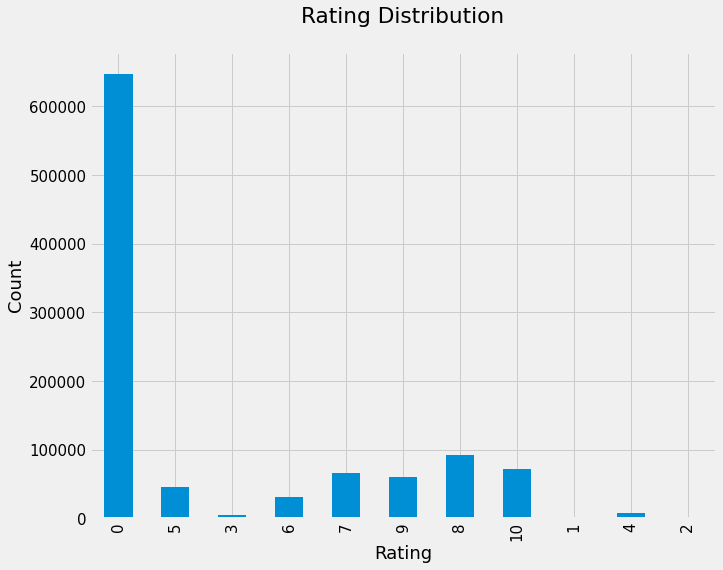

In [ ]:
# Distribution plot of ratings

plt.figure(figsize=(10,8))
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**The ratings are very unevenly distributed, and the vast majority of ratings are 0.**

**As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information.Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.**

**Hence segragating implicit and explict ratings datasets.**

In [ ]:
# Segragating implicit and explict ratings datasets

ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

####**Now let's see the distribution of explicit ratings**

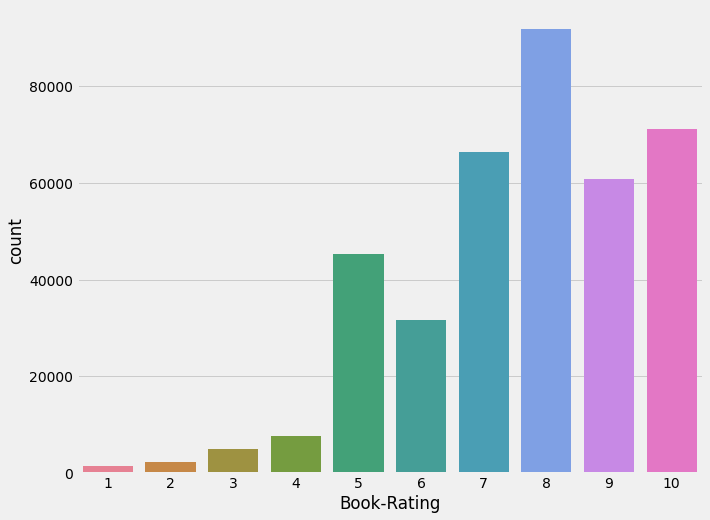

In [ ]:
# Distribution of explicit ratings

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='husl')

**It is found that the users rate higher ratings and rating 8 has been rated highest number of times.**

In [ ]:
# Top 5 most rated books

rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


**The book with ISBN '0316666343' received the most rating counts.**

###**Let’s check name of this book and what books are in the top 5.**

In [ ]:
# Names of top rated books

most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


Considerable points:

The title of most rated book is Alice Sebold’s “The Lovely Bones:A Novel”.

All 5 most rated books are Novels.

So it is conclusive that novels are popular and likely receive more ratings

In [ ]:
# Creating column Rating average 

ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')

In [ ]:
# Creating column Rating sum

ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


#**4. Merging all Datasets**

In [ ]:
# Merging all three datsets together

Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [ ]:
# Let's take a look at final_dataset

Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,34.746638,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,34.746638,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.000000,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,34.746638,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,34.746638,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [ ]:
# Shape of Final_Dataset

Final_Dataset.shape

(383842, 11)

In [ ]:
# Let's check percentage of null values in each column

missing_values(Final_Dataset)

,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Avg_Rating,0,0.0,float64
6,Total_No_Of_Users_Rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


**Great! 0% null values in Final_Dataset.**

#**5. Popularity Based Filtering**

Popularity based recommendation system works with the trend.

It uses the items which are in trend right now.

It suggest the most popular books to users who just signed up.

It solves the Cold-Start problem.

Book weighted avg formula:

####**Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]**
where,

v is the number of votes for the books.

m is the minimum votes required to be listed in the chart.

R is the average rating of the book.

C is the mean vote across the whole report.

####**Now let's find the values of v,m,R,C.**

In [ ]:
# Finding values of C and m.

C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569505161 , m=64.0


(38570, 11)

Here we used 90th percentile as our cutoff.

It means, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.

There are 38570 books which qualify to be in this list. 

Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books.


In [ ]:
# Weighted_rating function to find popular books.

def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [ ]:
# Keeping only one entry of each book

Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('seagreen',as_cmap=True)

In [ ]:
# Sorting books based on score calculated above

Top_Books = Top_Books.sort_values('Score', ascending=False)

In [ ]:
# Printing the top 5 popular books

Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


**The Popularity based recommender provide a general chart of recommended books to all the users.**

**They are not sensitive to the interests and tastes of a particular user.**

**Harry Potter and the Sorcerer's Stone is rated by maximum no. of users.**

#**6. Collaborative Filtering Recommender**

The goal of the recommender system is to predict user preference for a set of items based on the past experience.

Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users.

There are two categories of collaborative filtering algorithms:

Memory based

Model based.

**6.1 Model Based Approach**

Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.

The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.



In [ ]:
# Renaming columns of ratings_explicit dataframe

ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

**To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books.**

In [ ]:
# Extracting no. of users with atleast 3 ratings

user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))


Filter: users with at least 3 ratings
Number of records: 327271


In [ ]:
# Extracting top 10% most frequently rated books

book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: Top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: Top 10% most frequently rated books
Number of records: 160787


**SVD and NMF algorithms**

Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction.
Surprise package provides implementation of these algorithms.

In [ ]:
# Installing surprise package

!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 3.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633966 sha256=99ed995f558ad9ee94766d7daa627da634b295e9d9ab9cf9cf195694344af57a
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Importing modules

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
# First take copy of dataset

df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [ ]:
# Fitting SVD model with default hyperparameters

model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=5)
pd.DataFrame(cv_results_svd).mean()

test_rmse     1.593688
test_mae      1.231017
fit_time     12.321567
test_time     0.477753
dtype: float64

In [ ]:
# Fitting NMF model with default hyperparameters

model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=5)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.577924
test_mae      2.205235
fit_time     17.086898
test_time     0.303218
dtype: float64

**SVD gives better results in terms of accuracy and training/test time.**

Optimization of SVD

Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.
The hyperparameters of SVD:

n_factors - the number of factors

n_epochs - the number of iteration of the SGD procedure

lr_all - the learning rate for all parameters

reg_all - the regularization term for all parameter

In [ ]:
# Initializing parameters dictionary for GridSearchCV

param_grid = {'n_factors': [50,100, 150],
              'n_epochs': [10, 20, 30],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]}
              
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, joblib_verbose=2, n_jobs=-1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 22.0min


1.5873344946258063
{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 39.0min finished


##**Analysis of SVD model results**

**In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.**

In [ ]:
# Splitting train and test set and also fitting the model with hyperparameters obtained above

trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=50, n_epochs=20, lr_all=0.01, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
# Creating dataframe of results

df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
1744,265313,0439064872,7.0,8.358908,False,8.0,1.358908
27578,67375,1560763264,5.0,6.805260,False,7.0,1.805260
25320,237805,0385504209,10.0,8.886440,False,9.0,1.113560
7217,251606,0446672211,9.0,7.345397,False,7.0,1.654603
552,11676,0590494465,10.0,7.390045,False,7.0,2.609955


##**Let's see the distribution of actual and predicted book ratings**

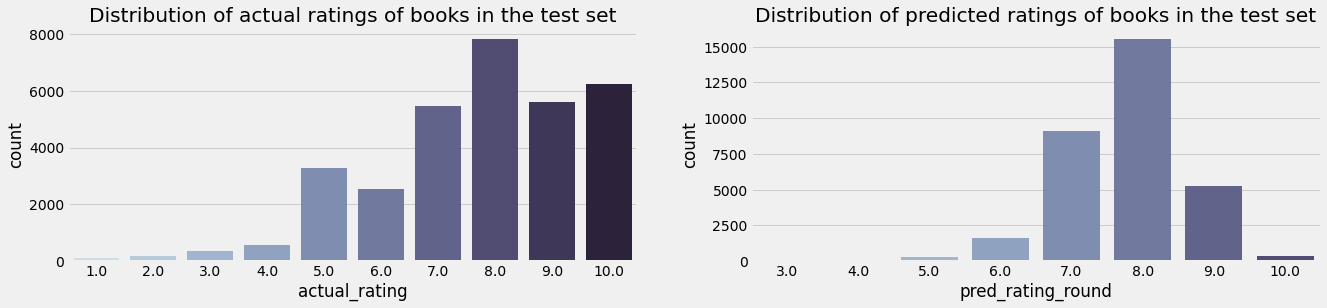

In [ ]:
# Distribution of actual and predicted book ratings

palette = sns.color_palette("ch:s=.25,rot=-.25", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

**According to the distribution of actual ratings of books in the test set:**

**The more number of users give positive scores - between 7 and 10.**

**The mode equals 8 but count of ratings 7, 9, 10 is also noticeable.**

**The distribution of predicted ratings in the test set is visibly different.**

**Here again, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.**

**It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings**

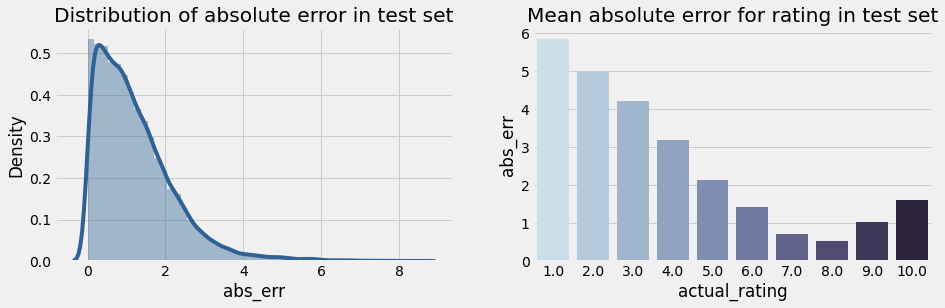

In [ ]:
# Distribution of absolute error of predicted ratings

df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

**The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1.**

**There is a long tail that indicates that there are several observations for which the absolute error was close to 10.**
##**Analysis of predicted ratings of a particular user**


In [ ]:
# Let's first make a copy of books dataset and merge on predicted dataframe

df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

**We select the user with ID 276688 to analyse ratings**

##**Train set: Top rated books**

In [ ]:
# Printing top 10 rated books by user 276680

selected_user_id = 276680
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
160714,276680,0312421273,10,7.138889,72,The Corrections: A Novel,NaN
160751,276680,0688163173,10,8.523810,21,Shutter Island: A Novel,NaN
160758,276680,1573221562,10,7.000000,7,Affinity,NaN
160745,276680,0679410325,9,8.500000,18,"Secret History, The",NaN
160757,276680,0805073337,9,7.875000,8,What Was She Thinking?: Notes on a Scandal: A ...,NaN
160727,276680,0385260083,9,7.312500,16,The Robber Bride,NaN
160761,276680,1931561648,9,8.513514,37,The Time Traveler's Wife (Today Show Book Club...,NaN
160729,276680,0385337116,9,7.108108,37,The Rule of Four,NaN
160750,276680,0688163165,10,8.666667,18,Mystic River,NaN
160718,276680,0316955132,9,9.500000,4,Marjorie Morningstar,NaN


##**Test set: Predicted top rated books**

In [ ]:
# Printing prediction of top 5 rated books

df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head()


,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
160715,276680,0312422156,10,8.305085,59,Middlesex: A Novel,8.212557
160746,276680,0679748083,9,9.142857,7,The Kitchen God's Wife (Vintage Contemporaries),8.097534
160754,276680,0743418700,6,8.000000,6,Salem Falls,8.074225
160759,276680,1573222038,10,8.545455,11,Fingersmith,8.066041
160736,276680,0425092917,8,7.606061,33,The Accidental Tourist,7.744953


##**Test set: Actual top rated books**

In [ ]:
# Printing actual top 5 rated books by user 276680

df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
160711,276680,0156028778,10,6.945946,37,The Crimson Petal and the White,7.361799
160715,276680,0312422156,10,8.305085,59,Middlesex: A Novel,8.212557
160759,276680,1573222038,10,8.545455,11,Fingersmith,8.066041
160746,276680,0679748083,9,9.142857,7,The Kitchen God's Wife (Vintage Contemporaries),8.097534
160721,276680,0345436911,8,7.472727,55,The Dress Lodger (Ballantine Reader's Circle),7.306008


**After analyzing book ratings by the user - 276680:**

**He/she likes fantasy stories as well as historical novels.**

**Among the recommended books there are one fanatasy story and two historical novels which correlates with user's previous preferences.**


#**6.2 Memory Based Approach**

###**Item-Item Based Filtering**

In [ ]:
# Top ratings dataframe

df_ratings_top.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


In [ ]:
# Renaming columns of top ratings dataframe

df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)


##**Implementing kNN to find similar users**

In [ ]:
# Generating ratings matrix from explicit ratings table

ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(18549, 13740)


ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Maximum number of values are NaN (undefined) i.e. absence of ratings.**

In [ ]:
# Considering only those users who gave explicit ratings

n_users = ratings_matrix.shape[0] 
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

18549 13740


In [ ]:
# Filling NaN values with 0

ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [ ]:
# Let's have a look on ratings_matrix

ratings_matrix.head()

ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Ratings_matrix becomes the sparse matrix.**

####**Let's check the % of sparsity**

In [ ]:
# Calculating sparsity of ratings_matrix

sparsity = 1.0-len(ratings_explicit)/float(ratings_explicit.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')


The sparsity level of Book Crossing dataset is 99.99272197962155 %


**Ratings_matrix has sparsity level upto 99.9%.**

In [ ]:
# Merging books and ratings dataset together

combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
columns = ['Book-Author','Year-Of-Publication', 'Publisher']

In [ ]:
# Renaming columns of combine_book_rating

combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Book-Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


**Let's drop NaN values from bookTitle column**

In [ ]:
# Dropping NaN values

combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])


In [ ]:
# Calculating counts of ratings

book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [ ]:
# Let's see the no. of ratings

book_ratingcount.head()

,bookTitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


**Let's merge the rating data with total rating count data.**

In [ ]:
# Merging rating data with total rating count data

rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'inner' )


In [ ]:
# Let's take a look at combined dataframe

rating_with_totalratingcount.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [ ]:
# Descriptive stats of TotalRatingCount

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


**The median book has been rated only once.**

In [ ]:
# Let's take a look at the top of the distribution

print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


**About 1% of the books received 50 or more ratings.**

**We have so many books in our data, so we will limit it to the top 1%.**

In [ ]:
# Setting popularity threshold at 50

popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [ ]:
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [ ]:
# Dropping duplicate values

if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (288740, 5)
New dataframe shape (285518, 5)
Removed 3222 rows


In [ ]:
# Creating rating matrix of US and Canada users

us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

###**Now let's find the nearest neighbors**

In [ ]:
# Fitting kNN model to find nearest neighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

#**Let's test our model and make few recommendations**


In [ ]:
# Making some recommendations considering 6 nearest neighbors

query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Cause of Death:

1: Unnatural Exposure, with distance of 0.839296862144933:
2: Point of Origin, with distance of 0.8442492053922959:
3: Cruel &amp; Unusual (Kay Scarpetta Mysteries (Paperback)), with distance of 0.8450384205114136:
4: From Potter's Field, with distance of 0.8463921950845323:
5: The Body Farm, with distance of 0.847148214081252:


**So, these are the recommendations made with the help of kNN.**

In [ ]:
# Filling Nan values with 0

us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)


In [ ]:
us_canada_user_rating_pivot2.head()

bookTitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
userID,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
# Shape of us_canada_user_rating dataset

us_canada_user_rating_pivot2.shape

(47994, 2444)

In [ ]:
# Applying transpose

X = us_canada_user_rating_pivot2.values.T
X.shape

(2444, 47994)

**Dimension of dataset is too large.**

**So, let's perform dimensionality reduction.**

#**Performing Dimensionality Reduction**

In [ ]:
# Using TruncatedSVD for Dimensionality Reduction

import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=12)
matrix = SVD.fit_transform(X)
matrix.shape

(2444, 12)

In [ ]:
# Making correlation coefficient matrix of books

corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

#**Let's find books similar to Harry Potter and the Sorcerer's Stone (Book 1)**

In [209]:
# Extracting book Harry Potter and the Sorcerer's Stone (Book 1)

us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [ ]:
# Making correlation matrix of Harry Potter and the Sorcerer's Stone (Book 1)

corr_coffey_hands  = corr[coffey_hands]

In [210]:
# Finding books similar to Harry Potter and the Sorcerer's Stone (Book 1)

list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])[0:4]

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

**So, these are the books which are similar to "Harry Potter and the Sorcerer's Stone".**

#**User-Item Based Filtering**

In [ ]:
# Renaming columns of ratings_explicit dataframe

ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000,1
3,276729,052165615X,3,3.000,1
4,276729,0521795028,6,6.000,1
8,276744,038550120X,7,7.580,81
16,276747,0060517794,9,8.000,30


#####**Let's extract number of users with at least 5 interactions.**

In [ ]:
# Printing number of users and number of users with atleast 5 interactions

users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Total Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('Number of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

Total Number of users: 68091
Number of users with at least 5 interactions: 449


#####**Let's extract no. of interactions from users with at least 5 interactions.**

In [ ]:
# Printing no. of interactions and no. of interactions from users with at least 5 interactions

print('Total number of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

Total number of interactions: 383842
Number of interactions from users with at least 5 interactions: 103271


In [ ]:
# Let's see those selected users

interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000,1
1,2033,0060248025,10,8.767,30
2,2033,0060256664,10,8.333,6
3,2033,0060256737,10,9.045,22
4,2033,0060950536,10,9.400,5
5,2033,0061020419,7,7.000,1
6,2033,0061020427,6,6.000,1
7,2033,0061056278,10,9.000,2
8,2033,0061056286,8,7.667,3
9,2033,0061056294,9,7.000,2


##**Now let's perform data scaling.**

In [ ]:
# Appling log transform on Book-Rating

def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 103271


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.170
1,0001046438,23902,3.322
2,000104687X,23902,2.807
3,0001047213,23902,3.322
4,0001047973,23902,3.322


##**Train test split**

In [ ]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [ ]:
# Applying train_test_split

interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=12)

print('Number of interactions on Train set: %d' % len(interactions_train_df))
print('Number of interactions on Test set: %d' % len(interactions_test_df))

Number of interactions on Train set: 82616
Number of interactions on Test set: 20655


In [ ]:
# Creating a sparse pivot table with users in rows and items in columns

users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,000104799X,0001048082,0001053736,0001053744,0001055607,0001845039,...,B00006I4OX,B00007FYKW,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B00013AX9E,B0001I1KOG
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
# Creating array of values of users items pivot matrix df

users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Extracting users ids

users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

###**Let's make factors of user-item matrix**

In [ ]:
# The number of factors to factor the user-item matrix.

NUMBER_OF_FACTORS_MF = 15

# Performs matrix factorization of the original user item matrix

U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
# Shape of user-item matrix

users_items_pivot_matrix.shape

(449, 55869)

######**Let's check the shapes of all three factors**

In [ ]:
U.shape

(449, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 55869)

#####**After the factorization, let's try to reconstruct the original matrix by multiplying its factors.**

In [ ]:
# Multiplying all factors

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.58064472e-02, -2.03710785e-03, -1.72155585e-03, ...,
         4.84594002e-03,  3.82570936e-04,  3.56049236e-04],
       [-5.64131800e-04, -1.12512350e-03, -9.50839662e-04, ...,
         2.09316536e-03,  1.47244246e-04,  1.05951803e-04],
       [ 3.38856233e-03, -2.16969458e-03, -1.83360464e-03, ...,
         3.37203937e-03,  2.21962780e-04,  1.58239970e-04],
       ...,
       [ 8.61171177e-03,  2.41295330e-03,  2.03918211e-03, ...,
         4.84657332e-03,  3.23674052e-04,  2.45122250e-04],
       [ 2.21622629e-02, -3.21463817e-03, -2.71668441e-03, ...,
         6.14348312e-03,  3.77215298e-04,  3.03985235e-04],
       [ 4.19186296e-03, -1.23664553e-03, -1.04508671e-03, ...,
         2.18670014e-03,  1.32703249e-04,  9.14053349e-05]])

In [ ]:
# Shape of resulting matrix

all_user_predicted_ratings.shape

(449, 55869)

**The resulting matrix is not sparse any more.**

**It generated predictions for items the user have not yet interaction, which we can use for recommendations.**


##**Let's convert the reconstructed matrix into a dataframe.**

In [ ]:
# Converting the reconstructed matrix back to a Pandas dataframe

cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.016,-0.001,0.003,-0.007,-0.001,-0.004,-0.003,0.015,0.027,0.013,...,0.001,0.002,-0.007,0.007,-0.012,-0.007,0.009,0.009,0.022,0.004
0001046438,-0.002,-0.001,-0.002,0.015,-0.001,0.009,0.016,0.002,-0.004,0.009,...,-0.003,0.015,-0.002,0.025,-0.007,-0.009,-0.000,0.002,-0.003,-0.001
000104687X,-0.002,-0.001,-0.002,0.013,-0.000,0.007,0.013,0.002,-0.003,0.008,...,-0.003,0.013,-0.001,0.021,-0.006,-0.008,-0.000,0.002,-0.003,-0.001
0001047213,-0.002,-0.001,-0.002,0.015,-0.001,0.009,0.016,0.002,-0.004,0.009,...,-0.003,0.015,-0.002,0.025,-0.007,-0.009,-0.000,0.002,-0.003,-0.001
000104799X,0.001,0.000,0.001,0.002,0.000,0.001,0.001,0.002,0.002,0.003,...,0.001,0.002,0.002,0.001,0.001,0.002,0.002,0.001,0.001,0.000


##**Now it's time to make some recommendations.**

In [ ]:
# Creating class for Collaborative Filtering Recommender

class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [ ]:
# Indexing by personId to speed up the searches during evaluation

interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
# Defining function to get interacted items by particular user

def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
# Creating ModelRecommender class to get recommendation for particular user

class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()


##**Let's recommend some books to User-ID 189835**

In [ ]:
# Printing list of users

print(list(interactions_full_indexed_df.index.values))

[171118, 23902, 23902, 23902, 23902, 166596, 23902, 109901, 189835, 189835, 85526, 93047, 95359, 56399, 229329, 11676, 69078, 63714, 101606, 11676, 36907, 85526, 26583, 120565, 101606, 11676, 193560, 262998, 23902, 63714, 11676, 159506, 189835, 11676, 180651, 63714, 193560, 274301, 120565, 30511, 189334, 189334, 275970, 166596, 23902, 6242, 101606, 101851, 11676, 95010, 11676, 37712, 123883, 94853, 23902, 23902, 11676, 189334, 11676, 11676, 149908, 30511, 94853, 225087, 172742, 120565, 16634, 88733, 218552, 264321, 189334, 56271, 11676, 63714, 6543, 30511, 134434, 76626, 240543, 26583, 248718, 76626, 56399, 270713, 168245, 168245, 98758, 23902, 63714, 107784, 37644, 37644, 168245, 164096, 35859, 177458, 136010, 197659, 23902, 11676, 11676, 23902, 78973, 200226, 30810, 11676, 242006, 225087, 11676, 274301, 11676, 30511, 193560, 189835, 39281, 120565, 11676, 183958, 11676, 148199, 23902, 109955, 76626, 193560, 148258, 11676, 63714, 85526, 109955, 23902, 225232, 148258, 189334, 105517, 62

In [ ]:
# Recommending books to user-ID 189835

user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  189835
Recommendation for User-ID =  189835
         ISBN                                         Book-Title  recStrength
0  0670839531         Needful Things: The Last Castle Rock Story        0.170
1  0451180232                       Nightmares &amp; Dreamscapes        0.157
2  0451156609                                  The Tommyknockers        0.156
3  0451190572  The Green Mile: Coffey on the Mile (Green Mile...        0.151
4  0312924585                               Silence of the Lambs        0.145
5  0451186362                                        Rose Madder        0.133
6  067102423X                                       Bag of Bones        0.128
7  067082982X                                      The Dark Half        0.125
8  0451167317                                      The Dark Half        0.113
9  0451170385                                 Four Past Midnight        0.112


#####**So, books like; Needful Things:The Last Castle Rock Story, The Tommyknockers, The Green Mile:Coffey on the Mile, etc. recommended to user 189835.**

#**7. Evaluating Results**

###**Top-N accuracy metrics**

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [ ]:
# Printing recall@5 and recall@10 values

print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.23795691115952552, 'recall@10': 0.3104333091261196}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
0,235,311,1389,0.169,0.224,11676
2,192,261,1138,0.169,0.229,98391
12,25,33,380,0.066,0.087,189835
150,86,99,369,0.233,0.268,153662
93,28,36,236,0.119,0.153,23902
139,29,52,204,0.142,0.255,235105
65,12,19,203,0.059,0.094,76499
89,27,37,193,0.140,0.192,171118
95,59,72,192,0.307,0.375,16795
27,23,29,188,0.122,0.154,248718


**Recall@5 is 23% and Recall@10 is 31%.**

#**Conclusion**

###**Thats it! We have come to an end of our long exercise. Throughout the analysis we went through various steps to determine our predictions for the mobile price range. We started with simple EDA, then we looked for missing values and outliers and did some feature modifications and last we recommend some books with help of Collaborative Filtering.**
####**The following conclusions have been drawn from this exercise:**



**1.   Out of Model Based and Memory Based, the performance decrease in case of Memory Based due to presence of sparse data.**

**2.    Amongst the memory based approach, item-item CF performed better than user-user CF because of lower computation requirements.**

**3.In Model Based Collaborative Filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE).**

**4.Majority of the readers were of the age bracket 20-30 years.**

**5. Majority of the readers belongs to North America and European countries namely USA, Canada, UK, Germany and Spain.**


